## Mall Customer Segmentation

As a supermarket mall owner and through membership cards , we have some basic data about our customers like Customer ID, age, gender, annual income and spending score.
Spending Score is something we assign to the customer based on our defined parameters like customer behavior and purchasing data.

In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content'
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 1.49MB/s]


In [5]:
import zipfile
import pandas as pd
import numpy as np
zip_file=zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python.zip')
df=pd.read_csv(zip_file.open('Mall_Customers.csv'))
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [26]:
df.rename(columns = {'Spending Score (1-100)':'Spending_Score'}, inplace = True)

In [38]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

# Different Segments in the Market 

## Spending Score based on Gender

#### Female's spending_score is higher than male's  

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


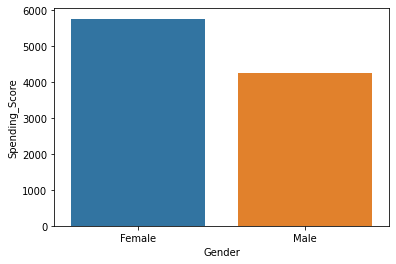

In [33]:
spending_dis=df.groupby(by=['Gender'],as_index=False)['Spending_Score'].sum()
sb.barplot(spending_dis.Gender,spending_dis.Spending_Score)
plt.show()


#### No of females and males across market segments:

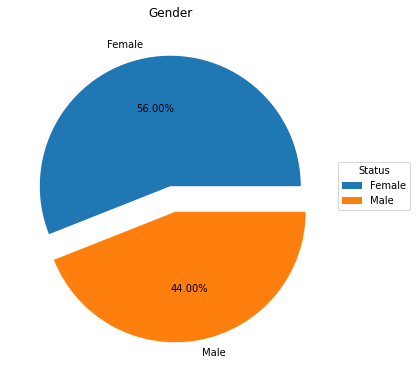

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
counts=df['Gender'].value_counts()
fig,ax=plt.subplots(figsize=(12,6))
w,t,a=ax.pie(x=counts.values, explode=[0,0.2], labels=counts.index, autopct='%1.2f%%', pctdistance=0.6,)
p=['Female','Male']
ax.legend(w, p,
          title="Status",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Gender')
plt.show()

#### No of people having annual salary around 55-60(k$) are highet in no.

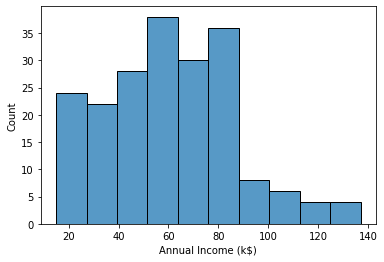

In [42]:
sb.histplot(data=df,x='Annual Income (k$)')#for loop handson book
plt.show()

# Outliers in Fields(or elemets) 

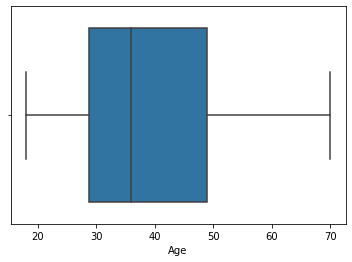

In [46]:
sb.boxplot(x=df['Age'])


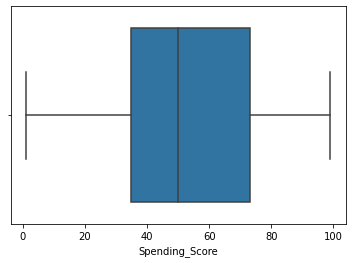

In [63]:
sb.boxplot(x=df['Spending_Score'])

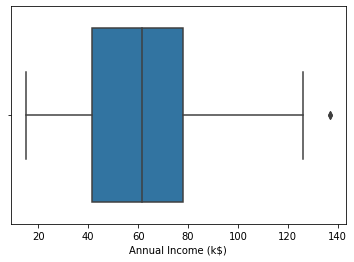

In [47]:
sb.boxplot(x=df['Annual Income (k$)'])

In [61]:
df_con_=df.loc[(df['Annual Income (k$)']>42 ) & (df['Age']>25) ]
df_con_=df_con_.loc[(df['Annual Income (k$)']<80 ) & (df['Age']<47) ]

In [64]:
df_con_1=df.loc[(df['Spending_Score']>35 ) & (df['Age']>25) ]

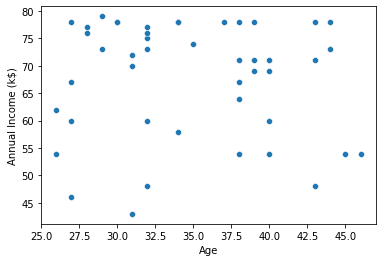

In [62]:
sb.scatterplot(data=df_con_,x='Age',y='Annual Income (k$)')

### Relation in variables

More aged people tend to spend less

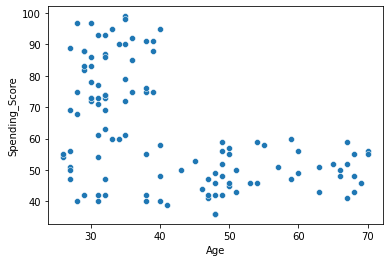

In [72]:
sb.scatterplot(data=df_con_1,x='Age',y='Spending_Score')

In [69]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending_Score'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc322121100>,
      dtype=object)

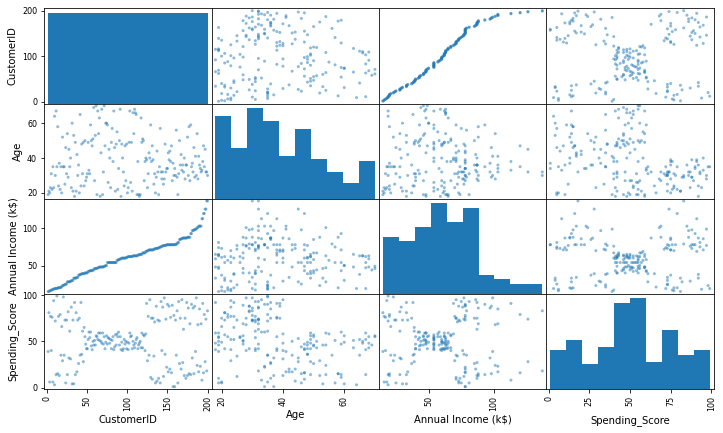

In [71]:
from pandas.plotting import scatter_matrix

att=['CustomerID', 'Age', 'Annual Income (k$)', 'Spending_Score']
scatter_matrix(df[att],figsize=(12,7))